In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer,LabelEncoder,OneHotEncoder
#https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/

In [2]:
x_train=[]
x_label=[]

#from keras metrics.py
# def categorical_accuracy(y_true, y_pred):
#     return K.cast(K.equal(K.argmax(y_true, axis=-1),
#                           K.argmax(y_pred, axis=-1)),
#                   K.floatx())


# def sparse_categorical_accuracy(y_true, y_pred):
#     return K.cast(K.equal(K.max(y_true, axis=-1),
#                           K.cast(K.argmax(y_pred, axis=-1), K.floatx())),
#                   K.floatx())

# https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/

In [3]:
#had to use 2 or 3 since with 0/1 was confusing (accuracy was ok, 
#but label predict did not macth!),
#then needed to use label encode to make 0/1
#I think the problem was the first label was one and second label was 0
#so basically it is possible since data had first instance as 1 in real data, class of first instance was 0
#that's why for label real at 1, get probability of e.g. [0.8,0.2] since 1 come before 0 in real class 1 is assigned to that
#guessing
#if label set to 1 then 0, if encode it (become 0 then 1, the model get the encoders right with argmax

# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
#(e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that
#is all-zeros except for a 1 at the index corresponding to the class of the sample). 
#In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical:

# from keras.utils.np_utils import to_categorical  make it one hot code

# categorical_labels = to_categorical(int_labels, num_classes=None)

# from keras.utils.np_utils import to_categorical  make it one hot code

# Use 'softmax' and 'categorical_crossentropy' instead of 'sigmoid' and 'binary_crossentropy'.
# By using the latter two, you're treating the problem as a multilabel problem, not a multiclass problem.

for i in range(1000):
    
    random_younger = randint(13,64)
    x_train.append(random_younger)
    x_label.append(0)
    

    random_older = randint(65,100)
    x_train.append(random_older)
    x_label.append(1)

for i in range(1000):
    
    random_younger = randint(13,64)
    x_train.append(random_younger)
    x_label.append(0)
    
   
    random_older = randint(65,100)
    x_train.append(random_older)
    x_label.append(1)

In [4]:
x_label[0:15]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [5]:
#1050 young 13<<65yr ,50 side effect  1000 ok
#1050 old 50 65< <100 yrs, side effect   1000 ok 

In [6]:
# x_young=np.random.randint(13,65,size=1000)
# label_young=np.random.randint(0,1,size=1000)

In [7]:
# x_old=np.random.randint(65,100,size=1000)
# label_old=np.random.randint(0,1,size=1000)

In [8]:
# x_young2=np.random.randint(13,65,size=50)
# label_young2=np.random.randint(1,2,size=50)
# x_old2=np.random.randint(65,100,size=50)
# label_old2=np.random.randint(1,2,size=50)

In [9]:
# x_train=np.concatenate((x_young,x_young2,x_old,x_old2),axis=0)

In [10]:
# x_label=np.concatenate((label_young,label_young2,label_old,label_old2),axis=0)

In [11]:
len(x_label)

4000

In [12]:
x_label[0:15]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [13]:
x_train=np.array(x_train)
x_label=np.array(x_label)

In [14]:
x_label.max()

1

In [15]:
x_train

array([47, 70, 52, ..., 84, 64, 76])

In [16]:
scaler=MinMaxScaler(feature_range=(0, 1))
#scaler2=LabelEncoder() #to make 0/1
scaler2=OneHotEncoder(sparse=False)

In [17]:
x_train.shape

(4000,)

In [18]:
x_label.shape

(4000,)

In [19]:
# x_train=x_train.reshape(2100,1)
# x_label=x_label.reshape(2100,1)

In [20]:
x_train.shape

(4000,)

In [21]:
from keras.utils.np_utils import to_categorical


scaled_xtrain=scaler.fit_transform((x_train).reshape(-1,1)) #this to make 2100,1
scaled_x_label=scaler2.fit_transform((x_label).reshape(-1,1)) #will do 2100,1 later
#scaled_x_label=to_categorical(x_label,num_classes=2)

/home/ania/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ania/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
scaled_xtrain

array([[0.3908046 ],
       [0.65517241],
       [0.44827586],
       ...,
       [0.81609195],
       [0.5862069 ],
       [0.72413793]])

In [23]:
x_label

array([0, 1, 0, ..., 1, 0, 1])

In [24]:
scaled_x_label

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [25]:
# scaled_x_label=scaled_x_label.reshape(2100,1)

In [26]:
x_label.shape

(4000,)

In [27]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.layers import activations
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [28]:
# scaled_x_label=keras.utils.to_categorical(x_label,num_classes=2) #was not working with number 2/3

In [29]:
#either use softmax two class and sparse_categorical cross entropy since it is not one hot coded 
#or use 1 class at end and use sigmoid but with binary cross entropy, similar results
model=Sequential([
    Dense(16,input_shape=(1,),activation='relu'),   
    # now the model will take as input arrays of shape (*, 1)
    # and output arrays of shape (*, 16)
    Dense(32,activation='relu'),
    # and output arrays of shape (*, 16)
    Dense(2,activation='softmax')
    # and output arrays of shape (*, 2) 
])


# model=Sequential([
#     Dense(16,input_shape=(1,),activation='relu'),   
#     # now the model will take as input arrays of shape (*, 1)
#     # and output arrays of shape (*, 16)
#     Dense(32,activation='relu'),
#     # and output arrays of shape (*, 16)
#     Dense(1,activation='sigmoid')
#     # and output arrays of shape (*, 2) 
# ])

In [30]:
model.summary()   #16*1+16, 16*32+32,32*2+2 paramter number

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#is using sparse categorical cross_entropy since the labels are 0 and 1 but not onehot coded, 
#if onehot coded use categorical cross entropy


In [32]:
from keras.callbacks import History 


In [33]:
model.fit(scaled_xtrain,scaled_x_label,batch_size=10,epochs=20,validation_split=0.1,shuffle=True,verbose=2)
#instead of validation_split, can creat a set for validation, validation_data=validation_set

Train on 3600 samples, validate on 400 samples
Epoch 1/20
 - 1s - loss: 0.4058 - acc: 0.8314 - val_loss: 0.1677 - val_acc: 0.9600
Epoch 2/20
 - 0s - loss: 0.1205 - acc: 0.9775 - val_loss: 0.0781 - val_acc: 0.9825
Epoch 3/20
 - 1s - loss: 0.0721 - acc: 0.9875 - val_loss: 0.0553 - val_acc: 0.9875
Epoch 4/20
 - 1s - loss: 0.0540 - acc: 0.9903 - val_loss: 0.0442 - val_acc: 0.9875
Epoch 5/20
 - 1s - loss: 0.0444 - acc: 0.9911 - val_loss: 0.0367 - val_acc: 0.9875
Epoch 6/20
 - 1s - loss: 0.0376 - acc: 0.9944 - val_loss: 0.0322 - val_acc: 1.0000
Epoch 7/20
 - 1s - loss: 0.0340 - acc: 0.9939 - val_loss: 0.0363 - val_acc: 0.9825
Epoch 8/20
 - 0s - loss: 0.0305 - acc: 0.9947 - val_loss: 0.0268 - val_acc: 0.9875
Epoch 9/20
 - 0s - loss: 0.0277 - acc: 0.9933 - val_loss: 0.0233 - val_acc: 1.0000
Epoch 10/20
 - 0s - loss: 0.0254 - acc: 0.9956 - val_loss: 0.0214 - val_acc: 1.0000
Epoch 11/20
 - 1s - loss: 0.0234 - acc: 0.9944 - val_loss: 0.0198 - val_acc: 1.0000
Epoch 12/20
 - 0s - loss: 0.0216 - acc

In [29]:
history=model.fit(scaled_xtrain,scaled_x_label,batch_size=10,epochs=20,validation_split=0.1,shuffle=True,verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.5979 - acc: 0.6847 - val_loss: 0.4411 - val_acc: 0.8476
Epoch 2/20
 - 0s - loss: 0.3659 - acc: 0.8974 - val_loss: 0.2043 - val_acc: 0.9857
Epoch 3/20
 - 0s - loss: 0.2838 - acc: 0.9265 - val_loss: 0.1583 - val_acc: 1.0000
Epoch 4/20
 - 0s - loss: 0.2690 - acc: 0.9339 - val_loss: 0.1390 - val_acc: 1.0000
Epoch 5/20
 - 0s - loss: 0.2642 - acc: 0.9307 - val_loss: 0.1286 - val_acc: 1.0000
Epoch 6/20
 - 0s - loss: 0.2594 - acc: 0.9376 - val_loss: 0.1286 - val_acc: 1.0000
Epoch 7/20
 - 0s - loss: 0.2563 - acc: 0.9360 - val_loss: 0.1167 - val_acc: 0.9952
Epoch 8/20
 - 0s - loss: 0.2541 - acc: 0.9376 - val_loss: 0.1129 - val_acc: 0.9952
Epoch 9/20
 - 0s - loss: 0.2513 - acc: 0.9423 - val_loss: 0.1085 - val_acc: 0.9905
Epoch 10/20
 - 0s - loss: 0.2508 - acc: 0.9386 - val_loss: 0.1051 - val_acc: 0.9952
Epoch 11/20
 - 0s - loss: 0.2486 - acc: 0.9344 - val_loss: 0.1040 - val_acc: 0.9952
Epoch 12/20
 - 0s - loss: 0.2480 - acc

In [31]:
history_dic=history.history

In [32]:
history_dic

{'val_loss': [0.44110792875289917,
  0.2042504520643325,
  0.15830392213094802,
  0.13900327717974073,
  0.12858013134627116,
  0.12863405900342123,
  0.11666815905343919,
  0.11292279369774319,
  0.10847986933021318,
  0.10505122815569241,
  0.10395408262099538,
  0.11446540057659149,
  0.1028531337422984,
  0.10002039426139422,
  0.1034136726742699,
  0.09997295588254929,
  0.10436657017895154,
  0.11035581128228278,
  0.11199303361631575,
  0.097032378472033],
 'val_acc': [0.847619042510078,
  0.985714282308306,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9952380941027686,
  0.9952380941027686,
  0.9904761882055373,
  0.9952380941027686,
  0.9952380941027686,
  1.0,
  0.9952380941027686,
  0.9952380941027686,
  1.0,
  0.9904761882055373,
  1.0,
  0.9619047556604657,
  0.9619047556604657,
  1.0],
 'loss': [0.5978988123633874,
  0.36593425971648047,
  0.2838251829226181,
  0.26897371122761377,
  0.26415792894032264,
  0.2593792984409938,
  0.2562962320667726,
  0.2541003262318631,
  0.25128582248

In [35]:
history_dic['loss']

[0.6311151470456805,
 0.4050883490730215,
 0.3090017532151212,
 0.28944984178930994,
 0.2824713561151709,
 0.2778078880574968,
 0.27388012170712783,
 0.27473513537613803,
 0.270484897194716,
 0.2697655486642684,
 0.26940334487765555,
 0.26677854719852645,
 0.2661934647925947,
 0.2661324565412191,
 0.26326509758278177,
 0.26404401504252323,
 0.263629350771822,
 0.26114314717669335,
 0.2595585984370065,
 0.25628116273533097]

In [36]:
history_dic['acc']

[0.6280423320396237,
 0.8846560763934302,
 0.9248677179926917,
 0.9275132203228259,
 0.9312169230173505,
 0.9333333246922367,
 0.9343915266334695,
 0.9322751243278463,
 0.9365079292544612,
 0.9359788279684763,
 0.9333333268998161,
 0.9322751252739517,
 0.9391534328460693,
 0.9301587223375916,
 0.938095230589468,
 0.9349206288655599,
 0.9317460239879669,
 0.9349206285501914,
 0.9354497285747023,
 0.9349206294962968]

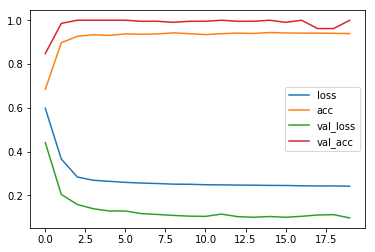

In [33]:
import matplotlib.pyplot as plt
list_epoch=np.arange(0,20)
plt.plot(list_epoch,history_dic['loss'])
plt.plot(list_epoch,history_dic['acc'])
plt.plot(list_epoch,history_dic['val_loss'])
plt.plot(list_epoch,history_dic['val_acc'])
plt.legend(['loss','acc','val_loss','val_acc'])

In [34]:
predict=model.predict(scaled_xtrain, batch_size=10, verbose=0) 

In [35]:
predict

array([[9.9999130e-01, 8.7301951e-06],
       [2.3915680e-04, 9.9976081e-01],
       [9.9999166e-01, 8.3672221e-06],
       ...,
       [8.8839753e-09, 1.0000000e+00],
       [4.3142250e-01, 5.6857759e-01],
       [2.3612570e-06, 9.9999762e-01]], dtype=float32)

In [37]:
predict_round=np.argmax(predict,axis=1)
#predict_round=predict.round()

In [38]:
#predict_round[:,0]
predict_round

array([0, 1, 0, ..., 1, 1, 1])

In [39]:
scaled_x_label

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [40]:
x_label

array([0, 1, 0, ..., 1, 0, 1])

In [41]:
scaled_xlabel_round=np.argmax(scaled_x_label,axis=1)

In [42]:
scaled_xlabel_round

array([0, 1, 0, ..., 1, 0, 1])

In [43]:
np.mean(predict_round==scaled_xlabel_round) #[:,0] to get numbers without arrays

0.99025

In [44]:
predict_round[-100:]

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [45]:
scaled_xlabel_round[-100:]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

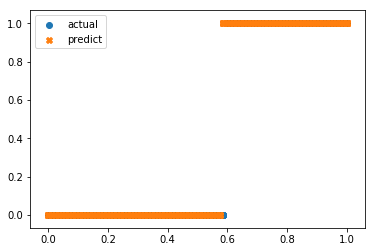

In [47]:
import matplotlib.pyplot as plt
plt.scatter(scaled_xtrain,scaled_xlabel_round,marker='o')
plt.scatter(scaled_xtrain,predict_round,marker='X')
plt.legend(['actual','predict'])


# get test data

In [65]:
x_test=[]
label_test=[]

for i in range(200):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    x_test.append(random_younger)
    label_test.append(0)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    x_test.append(random_older)
    label_test.append(1)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    x_test.append(random_younger)
    label_test.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    x_test.append(random_older)
    label_test.append(1)

In [66]:
x_test=np.array(x_test)
label_test=np.array(label_test)

In [67]:
#label_test

In [68]:
# scaled_xtest=scaler.fit_transform((x_test).reshape(-1,1)) #this to make 2100,1
# #scaled_x_label=scaler2.fit_transform((x_label)) #will do 2100,1 later
# scaled_label_test=to_categorical(label_test,num_classes=2)


# scaled_xtest=scaler.fit_transform((x_test).reshape(-1,1)) #this to make 2100,1
# scaled_x_label=scaler2.fit_transform((label_test).reshape(-1,1)) #will do 2100,1 later

scaled_xtest=scaler.transform((x_test).reshape(-1,1)) #this to make 2100,1
scaled_x_label=scaler2.transform((label_test).reshape(-1,1)) #will do 2100,1 later

In [69]:
#scaled_label_test

# array([[0., 1.],
#        [1., 0.],
#        [0., 1.],
#        [1., 0.],
#        [0., 1.],

In [70]:
predict=model.predict(scaled_xtest, batch_size=10, verbose=0) 

In [71]:
predict

array([[9.9999166e-01, 8.3267923e-06],
       [2.7130884e-10, 1.0000000e+00],
       [9.9998581e-01, 1.4139704e-05],
       ...,
       [4.5193981e-02, 9.5480603e-01],
       [9.9996459e-01, 3.5447676e-05],
       [2.9440050e-03, 9.9705601e-01]], dtype=float32)

In [72]:
predict_round=np.argmax(predict,axis=1)

In [73]:
scaled_xlabel_round=np.argmax(scaled_x_label,axis=1)

In [74]:
np.mean(predict_round==scaled_xlabel_round)

0.99125

In [91]:
from sklearn.metrics import confusion_matrix,f1_score
import itertools

In [92]:
confusion_matrix(predict_round,scaled_xlabel_round)

array([[393,   0],
       [  7, 400]])

In [93]:
f1_score(predict_round,scaled_xlabel_round)

0.9913258983890954

In [94]:
cm=confusion_matrix(predict_round,scaled_xlabel_round)

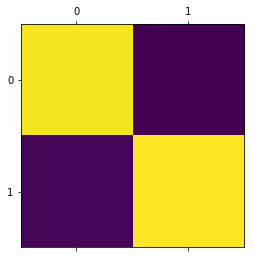

In [95]:
plt.matshow(cm)

In [96]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[393   0]
 [  7 400]]


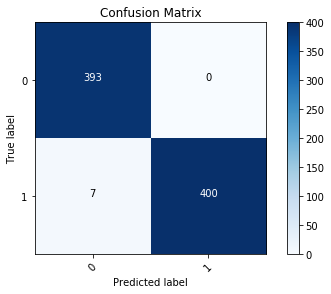

In [97]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# save and load model

In [98]:
#save the whole model including the weights, configuration, optimizer
model.save('model_ANN3.h5')

In [99]:
from keras.models import load_model
new_model=load_model('model_ANN3.h5')

In [100]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [121]:
new_model.get_layer('dense_1')

In [105]:
new_model.get_config()

[{'class_name': 'Dense',
  'config': {'name': 'dense_1',
   'trainable': True,
   'batch_input_shape': (None, 1),
   'dtype': 'float32',
   'units': 16,
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'Dense',
  'config': {'name': 'dense_2',
   'trainable': True,
   'units': 32,
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer':

In [104]:
new_model.get_weights()

[array([[-0.5485538 , -0.16605979,  0.6971471 , -0.23878744,  0.57698375,
         -0.4628256 , -0.30079538,  0.6509036 , -0.00968093,  0.5443936 ,
          0.34185925,  0.6021395 ,  0.7477392 , -0.3899328 , -0.01809061,
         -0.5431478 ]], dtype=float32),
 array([ 0.        ,  0.        , -0.31074166,  0.        , -0.05290677,
         0.        ,  0.        , -0.3095495 ,  0.        , -0.27527633,
         0.2506706 , -0.29085296, -0.33256745,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 4.83879447e-03,  2.49554008e-01, -1.10233143e-01,
          1.22231513e-01,  7.92871416e-02, -1.75251573e-01,
         -4.67080772e-02, -1.84210807e-01, -1.67204127e-01,
         -7.78524876e-02,  4.00201976e-02, -4.23411429e-02,
          2.44834214e-01, -3.15044224e-02, -1.75395787e-01,
          1.48780048e-02,  3.86138558e-02,  9.13387835e-02,
         -2.78848678e-01,  1.21202350e-01, -7.92557895e-02,
         -3.00695002e-01,  1.39850646e-01,  8.88979435e-03,
 

# model to_json

In [106]:
# save the architechture no weight

json_string=model.to_json()  ##model.to_yaml()

In [107]:
from keras.models import model_from_json #model_from_yaml/confimg

In [108]:
model_architecture=model_from_json(json_string)

In [109]:
model_architecture

In [111]:
model.save_weights('ANN3_save_weight.h5')

In [112]:
model2=model_from_json(json_string)   #building up new model, from json the archituecture and from load_weigh the weights

In [113]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [114]:
model2.load_weights('ANN3_save_weight.h5')

In [115]:
model2.get_weights()

[array([[-0.5485538 , -0.16605979,  0.6971471 , -0.23878744,  0.57698375,
         -0.4628256 , -0.30079538,  0.6509036 , -0.00968093,  0.5443936 ,
          0.34185925,  0.6021395 ,  0.7477392 , -0.3899328 , -0.01809061,
         -0.5431478 ]], dtype=float32),
 array([ 0.        ,  0.        , -0.31074166,  0.        , -0.05290677,
         0.        ,  0.        , -0.3095495 ,  0.        , -0.27527633,
         0.2506706 , -0.29085296, -0.33256745,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 4.83879447e-03,  2.49554008e-01, -1.10233143e-01,
          1.22231513e-01,  7.92871416e-02, -1.75251573e-01,
         -4.67080772e-02, -1.84210807e-01, -1.67204127e-01,
         -7.78524876e-02,  4.00201976e-02, -4.23411429e-02,
          2.44834214e-01, -3.15044224e-02, -1.75395787e-01,
          1.48780048e-02,  3.86138558e-02,  9.13387835e-02,
         -2.78848678e-01,  1.21202350e-01, -7.92557895e-02,
         -3.00695002e-01,  1.39850646e-01,  8.88979435e-03,
 